**Investigating the Adoption of Research Software**

***Survey***

In [ ]:
from google.colab import files
import io
uploaded = files.upload()


Saving Survey_Perfil_Desenvolvedor_SE_Factors.xlsx to Survey_Perfil_Desenvolvedor_SE_Factors.xlsx


In [ ]:
file_name = next(iter(uploaded))
file_name

'Survey_Perfil_Desenvolvedor_SE_Factors.xlsx'

In [ ]:
%matplotlib inline

import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statistics as s



In [ ]:
df = pd.read_excel(file_name)


df

,PERFIL,TEMPO_USO,FREQUENCIA_USO,IDADE,GENERO,FORMACAO,ANOS_EXPERIENCIA,ENG_SOFT_D04F01,ENG_SOFT_D04F02,ENG_SOFT_D04F03,...,TAMANHO_EQUIPE,NIVEL_CONHECIMENTO_ENG_SOFT,TREINAMENTO_PROCESSO,USA_PROCESSO_D07F01,USA_PROCESSO_D07F02,USA_PROCESSO_D07F03,USA_PROCESSO_D07F04,USA_PROCESSO_D07F05,USA_PROCESSO_D07F06,USA_PROCESSO_D07F07
0,2.0,1.0,4.0,1.0,1.0,2.0,2.0,5.0,5.0,5.0,...,2.0,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,2.0,2.0,5.0,1.0,2.0,2.0,2.0,4.0,3.0,4.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,4.0,5.0,1.0,2.0,4.0,3.0,5.0,5.0,5.0,...,2.0,3.0,1.0,3.0,2.0,4.0,4.0,0.0,0.0,3.0
3,2.0,4.0,3.0,4.0,1.0,5.0,6.0,4.0,4.0,5.0,...,2.0,5.0,1.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0
4,2.0,4.0,5.0,5.0,2.0,6.0,6.0,4.0,5.0,4.0,...,3.0,3.0,1.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0
5,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,4.0,5.0,...,2.0,4.0,1.0,5.0,1.0,4.0,3.0,3.0,3.0,3.0
6,2.0,4.0,5.0,5.0,2.0,5.0,6.0,5.0,4.0,5.0,...,2.0,5.0,1.0,4.0,3.0,4.0,4.0,3.0,3.0,1.0
7,2.0,3.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,...,2.0,5.0,1.0,3.0,2.0,4.0,3.0,1.0,4.0,2.0
8,2.0,3.0,5.0,1.0,2.0,3.0,2.0,3.0,2.0,4.0,...,2.0,3.0,1.0,5.0,3.0,2.0,0.0,0.0,0.0,4.0
9,2.0,3.0,3.0,1.0,2.0,4.0,2.0,5.0,3.0,4.0,...,1.0,3.0,1.0,4.0,1.0,4.0,3.0,1.0,1.0,3.0


In [ ]:
df1_extra = df.loc[:, lambda df:['ENG_SOFT_D04F08', 'USA_PROCESSO_D07F01']]
df1_extra.columns = ['Importance of Software Process', 'Use of Agile Method',]
df1_extra

,Importance of Software Process,Use of Agile Method
0,5.0,5.0
1,3.0,0.0
2,3.0,3.0
3,4.0,4.0
4,4.0,4.0
5,4.0,5.0
6,4.0,4.0
7,3.0,3.0
8,3.0,5.0
9,4.0,4.0


In [ ]:
# Selecting columns
df1 = df.loc[:, lambda df:['ENG_SOFT_D04F01', 'ENG_SOFT_D04F02', 'ENG_SOFT_D04F03', 'ENG_SOFT_D04F04', 'ENG_SOFT_D04F05', 'ENG_SOFT_D04F06', 'ENG_SOFT_D04F07', 'ENG_SOFT_D04F08', 'ENG_SOFT_D04F11', 'ENG_SOFT_D04F12' ]]
# columns 09 and 10 are related to proc and metric out of SWEBOK.
df1.columns = ['D04F01', 'D04F02','D04F03', 'D04F04', 'D04F05', 'D04F06', 'D04F07', 'D04F08', 'D04F09', 'D04F10']
df1

,D04F01,D04F02,D04F03,D04F04,D04F05,D04F06,D04F07,D04F08,D04F09,D04F10
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,5.0,2.0
2,5.0,5.0,5.0,5.0,3.0,5.0,5.0,3.0,4.0,4.0
3,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
4,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0
5,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0
6,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0
7,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0
8,3.0,2.0,4.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0
9,5.0,3.0,4.0,5.0,4.0,2.0,1.0,4.0,5.0,2.0


In [ ]:
df1.style.format("{:.2}").set_properties(**{'text-align': 'center'}).set_table_styles([
    dict(selector="th", props=[("text-align", "center")]),]).hide_index()


D04F01,D04F02,D04F03,D04F04,D04F05,D04F06,D04F07,D04F08,D04F09,D04F10
5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,5.0,2.0
5.0,5.0,5.0,5.0,3.0,5.0,5.0,3.0,4.0,4.0
4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0
4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0
5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0
4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0
3.0,2.0,4.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0
5.0,3.0,4.0,5.0,4.0,2.0,1.0,4.0,5.0,2.0


In [ ]:
print("\n\033[1mReport Investigating Research Software (Survey) \033[0m")
print("\nTotal of respondents = ", len(df1))



Report Investigating Research Software (Survey) 

Total of respondents =  30



D04F01 = Have Software Requirements

D04F02 = Have Software Project

D04F03 = Have Software Construction

D04F04 = Have Software Testing

D04F05 = Have Software Maintenance

D04F06 = Have Software Configuration Management

D04F07 = Have Project Management

D04F08 = Have Software Process

D04F09 = Have Software Quality

D04F10 = Using Software Engineering Tools and Methods

**RQ1) What is the level of importance of factors of Software Engineering that determine the success of research software developed in academia? SWEBOK**

In [ ]:
df1.describe().style.format("{:.4}")

,D04F01,D04F02,D04F03,D04F04,D04F05,D04F06,D04F07,D04F08,D04F09,D04F10
count,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
mean,4.367,4.2,4.2,4.367,4.3,4.133,3.733,3.767,4.333,3.9
std,0.7184,0.8867,0.9613,0.8899,0.8367,1.042,1.258,1.194,0.7112,1.029
min,3.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,1.0
25%,4.0,4.0,4.0,4.0,4.0,3.25,3.0,3.0,4.0,3.25
50%,4.5,4.0,4.5,5.0,4.5,4.5,4.0,4.0,4.0,4.0
75%,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.75,5.0,5.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
df3_grafico = pd.DataFrame({'D04F01 (%)':[(len(df1.loc[df1['D04F01'] == 5.0])/30) *100, (len(df1.loc[df1['D04F01'] == 4.0])/30) *100, (len(df1.loc[df1['D04F01'] == 3.0])/30) *100, (len(df1.loc[df1['D04F01'] == 2.0])/30) *100, (len(df1.loc[df1['D04F01'] == 1.0])/30) *100, (len(df1.loc[df1['D04F01'] == 0.0])/30) *100],
                   'D04F02 (%)':[(len(df1.loc[df1['D04F02'] == 5.0])/30) *100, (len(df1.loc[df1['D04F02'] == 4.0])/30) *100, (len(df1.loc[df1['D04F02'] == 3.0])/30) *100, (len(df1.loc[df1['D04F02'] == 2.0])/30) *100, (len(df1.loc[df1['D04F02'] == 1.0])/30) *100, (len(df1.loc[df1['D04F02'] == 0.0])/30) *100],
                   'D04F03 (%)':[(len(df1.loc[df1['D04F03'] == 5.0])/30) *100, (len(df1.loc[df1['D04F03'] == 4.0])/30) *100, (len(df1.loc[df1['D04F03'] == 3.0])/30) *100, (len(df1.loc[df1['D04F03'] == 2.0])/30) *100, (len(df1.loc[df1['D04F03'] == 1.0])/30) *100, (len(df1.loc[df1['D04F03'] == 0.0])/30) *100],
                   'D04F04 (%)':[(len(df1.loc[df1['D04F04'] == 5.0])/30) *100, (len(df1.loc[df1['D04F04'] == 4.0])/30) *100, (len(df1.loc[df1['D04F04'] == 3.0])/30) *100, (len(df1.loc[df1['D04F04'] == 2.0])/30) *100, (len(df1.loc[df1['D04F04'] == 1.0])/30) *100, (len(df1.loc[df1['D04F04'] == 0.0])/30) *100],
                   'D04F05 (%)':[(len(df1.loc[df1['D04F05'] == 5.0])/30) *100, (len(df1.loc[df1['D04F05'] == 4.0])/30) *100, (len(df1.loc[df1['D04F05'] == 3.0])/30) *100, (len(df1.loc[df1['D04F05'] == 2.0])/30) *100, (len(df1.loc[df1['D04F05'] == 1.0])/30) *100, (len(df1.loc[df1['D04F05'] == 0.0])/30) *100],
                   'D04F06 (%)':[(len(df1.loc[df1['D04F06'] == 5.0])/30) *100, (len(df1.loc[df1['D04F06'] == 4.0])/30) *100, (len(df1.loc[df1['D04F06'] == 3.0])/30) *100, (len(df1.loc[df1['D04F06'] == 2.0])/30) *100, (len(df1.loc[df1['D04F06'] == 1.0])/30) *100, (len(df1.loc[df1['D04F06'] == 0.0])/30) *100],
                   'D04F07 (%)':[(len(df1.loc[df1['D04F07'] == 5.0])/30) *100, (len(df1.loc[df1['D04F07'] == 4.0])/30) *100, (len(df1.loc[df1['D04F07'] == 3.0])/30) *100, (len(df1.loc[df1['D04F07'] == 2.0])/30) *100, (len(df1.loc[df1['D04F07'] == 1.0])/30) *100, (len(df1.loc[df1['D04F07'] == 0.0])/30) *100],
                   'D04F08 (%)':[(len(df1.loc[df1['D04F08'] == 5.0])/30) *100, (len(df1.loc[df1['D04F08'] == 4.0])/30) *100, (len(df1.loc[df1['D04F08'] == 3.0])/30) *100, (len(df1.loc[df1['D04F08'] == 2.0])/30) *100, (len(df1.loc[df1['D04F08'] == 1.0])/30) *100, (len(df1.loc[df1['D04F08'] == 0.0])/30) *100],
                   'D04F09 (%)':[(len(df1.loc[df1['D04F09'] == 5.0])/30) *100, (len(df1.loc[df1['D04F09'] == 4.0])/30) *100, (len(df1.loc[df1['D04F09'] == 3.0])/30) *100, (len(df1.loc[df1['D04F09'] == 2.0])/30) *100, (len(df1.loc[df1['D04F09'] == 1.0])/30) *100, (len(df1.loc[df1['D04F09'] == 0.0])/30) *100],
                   'D04F10 (%)':[(len(df1.loc[df1['D04F10'] == 5.0])/30) *100, (len(df1.loc[df1['D04F10'] == 4.0])/30) *100, (len(df1.loc[df1['D04F10'] == 3.0])/30) *100, (len(df1.loc[df1['D04F10'] == 2.0])/30) *100, (len(df1.loc[df1['D04F10'] == 1.0])/30) *100, (len(df1.loc[df1['D04F10'] == 0.0])/30) *100]
                   })
# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know']
df3_grafico.index = index_

pd.options.display.float_format = '{:.2f}'.format

df3_grafico

center_aligned_df = df3_grafico.style.set_properties(**{'text-align': 'center'})
 
center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df


df3_grafico


,D04F01 (%),D04F02 (%),D04F03 (%),D04F04 (%),D04F05 (%),D04F06 (%),D04F07 (%),D04F08 (%),D04F09 (%),D04F10 (%)
Very important,50.00,43.33,50.00,56.67,50.00,50.00,30.00,26.67,46.67,30.00
Important,36.67,40.00,26.67,30.00,33.33,23.33,36.67,43.33,40.00,43.33
Median important,13.33,10.00,16.67,6.67,13.33,16.67,20.00,20.00,13.33,16.67
Little important,0.00,6.67,6.67,6.67,3.33,10.00,6.67,3.33,0.00,6.67
Nothing important,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,0.00,3.33
I don't know,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,0.00,0.00


In [ ]:
df3_grafico

,D04F01 (%),D04F02 (%),D04F03 (%),D04F04 (%),D04F05 (%),D04F06 (%),D04F07 (%),D04F08 (%),D04F09 (%),D04F10 (%)
Very important,50.00,43.33,50.00,56.67,50.00,50.00,30.00,26.67,46.67,30.00
Important,36.67,40.00,26.67,30.00,33.33,23.33,36.67,43.33,40.00,43.33
Median important,13.33,10.00,16.67,6.67,13.33,16.67,20.00,20.00,13.33,16.67
Little important,0.00,6.67,6.67,6.67,3.33,10.00,6.67,3.33,0.00,6.67
Nothing important,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,0.00,3.33
I don't know,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,0.00,0.00


In [ ]:
df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
df4


,D04F01 (%),D04F02 (%),D04F03 (%),D04F04 (%),D04F05 (%),D04F06 (%),D04F07 (%),D04F08 (%),D04F09 (%),D04F10 (%)
Very important,50.00,43.33,50.00,56.67,50.00,50.00,30.00,26.67,46.67,30.00
Important,36.67,40.00,26.67,30.00,33.33,23.33,36.67,43.33,40.00,43.33


In [ ]:

df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)

df5 

,D04F01 (%),D04F02 (%),D04F03 (%),D04F04 (%),D04F05 (%),D04F06 (%),D04F07 (%),D04F08 (%),D04F09 (%),D04F10 (%)
0,50.00,43.33,50.00,56.67,50.00,50.00,30.00,26.67,46.67,30.00
1,36.67,40.00,26.67,30.00,33.33,23.33,36.67,43.33,40.00,43.33
2,86.67,83.33,76.67,86.67,83.33,73.33,66.67,70.00,86.67,73.33


In [ ]:
df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)

# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']
df3_grafico.index = index_

df3_grafico

,D04F01 (%),D04F02 (%),D04F03 (%),D04F04 (%),D04F05 (%),D04F06 (%),D04F07 (%),D04F08 (%),D04F09 (%),D04F10 (%)
Very important,50.00,43.33,50.00,56.67,50.00,50.00,30.00,26.67,46.67,30.00
Important,36.67,40.00,26.67,30.00,33.33,23.33,36.67,43.33,40.00,43.33
Median important,13.33,10.00,16.67,6.67,13.33,16.67,20.00,20.00,13.33,16.67
Little important,0.00,6.67,6.67,6.67,3.33,10.00,6.67,3.33,0.00,6.67
Nothing important,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,0.00,3.33
I don't know,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,0.00,0.00
Total,86.67,83.33,76.67,86.67,83.33,73.33,66.67,70.00,86.67,73.33


In [ ]:
df3_grafico.sort_values(by=['Total'], axis=1, ascending=[False])

,D04F01 (%),D04F04 (%),D04F09 (%),D04F02 (%),D04F05 (%),D04F03 (%),D04F10 (%),D04F06 (%),D04F08 (%),D04F07 (%)
Very important,50.00,56.67,46.67,43.33,50.00,50.00,30.00,50.00,26.67,30.00
Important,36.67,30.00,40.00,40.00,33.33,26.67,43.33,23.33,43.33,36.67
Median important,13.33,6.67,13.33,10.00,13.33,16.67,16.67,16.67,20.00,20.00
Little important,0.00,6.67,0.00,6.67,3.33,6.67,6.67,10.00,3.33,6.67
Nothing important,0.00,0.00,0.00,0.00,0.00,0.00,3.33,0.00,3.33,3.33
I don't know,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33
Total,86.67,86.67,86.67,83.33,83.33,76.67,73.33,73.33,70.00,66.67


In [ ]:
#df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
#df4

#df4['Level'] = df4.index
#df4 = df4.rename_axis('index').reset_index()

df4 = df3_grafico

#df4.style.hide_index()

df5 = df4.transpose()

df5


,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D04F01 (%),50.00,36.67,13.33,0.00,0.00,0.00,86.67
D04F02 (%),43.33,40.00,10.00,6.67,0.00,0.00,83.33
D04F03 (%),50.00,26.67,16.67,6.67,0.00,0.00,76.67
D04F04 (%),56.67,30.00,6.67,6.67,0.00,0.00,86.67
D04F05 (%),50.00,33.33,13.33,3.33,0.00,0.00,83.33
D04F06 (%),50.00,23.33,16.67,10.00,0.00,0.00,73.33
D04F07 (%),30.00,36.67,20.00,6.67,3.33,3.33,66.67
D04F08 (%),26.67,43.33,20.00,3.33,3.33,3.33,70.00
D04F09 (%),46.67,40.00,13.33,0.00,0.00,0.00,86.67
D04F10 (%),30.00,43.33,16.67,6.67,3.33,0.00,73.33


In [ ]:
df5[['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']] = df5[['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']].astype(float)

df6 = df5.sort_values(by=['Total', 'Very important'] , ascending=[False, False])

df6

,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D04F04 (%),56.67,30.00,6.67,6.67,0.00,0.00,86.67
D04F01 (%),50.00,36.67,13.33,0.00,0.00,0.00,86.67
D04F09 (%),46.67,40.00,13.33,0.00,0.00,0.00,86.67
D04F02 (%),43.33,40.00,10.00,6.67,0.00,0.00,83.33
D04F05 (%),50.00,33.33,13.33,3.33,0.00,0.00,83.33
D04F03 (%),50.00,26.67,16.67,6.67,0.00,0.00,76.67
D04F10 (%),30.00,43.33,16.67,6.67,3.33,0.00,73.33
D04F06 (%),50.00,23.33,16.67,10.00,0.00,0.00,73.33
D04F08 (%),26.67,43.33,20.00,3.33,3.33,3.33,70.00
D04F07 (%),30.00,36.67,20.00,6.67,3.33,3.33,66.67


In [ ]:
df_new1 = df6.loc['D04F04 (%)': 'D04F09 (%)']

df_new2 = df6.loc['D04F02 (%)': 'D04F05 (%)']
df_new2 = df_new2.sort_values(by=['Very important'] , ascending=[False])

df_new3 = df6.loc['D04F03 (%)': 'D04F03 (%)']

df_new4 = df6.loc['D04F10 (%)': 'D04F06 (%)']
df_new4 = df_new4.sort_values(by=['Very important'] , ascending=[False])

df_new5 = df6.loc['D04F08 (%)': 'D04F07 (%)']


frames = [df_new1, df_new2, df_new3, df_new4, df_new5]

result = pd.concat(frames)

result


,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D04F04 (%),56.67,30.00,6.67,6.67,0.00,0.00,86.67
D04F01 (%),50.00,36.67,13.33,0.00,0.00,0.00,86.67
D04F09 (%),46.67,40.00,13.33,0.00,0.00,0.00,86.67
D04F05 (%),50.00,33.33,13.33,3.33,0.00,0.00,83.33
D04F02 (%),43.33,40.00,10.00,6.67,0.00,0.00,83.33
D04F03 (%),50.00,26.67,16.67,6.67,0.00,0.00,76.67
D04F06 (%),50.00,23.33,16.67,10.00,0.00,0.00,73.33
D04F10 (%),30.00,43.33,16.67,6.67,3.33,0.00,73.33
D04F08 (%),26.67,43.33,20.00,3.33,3.33,3.33,70.00
D04F07 (%),30.00,36.67,20.00,6.67,3.33,3.33,66.67


In [ ]:
df7 = result.transpose()

df7

,D04F04 (%),D04F01 (%),D04F09 (%),D04F05 (%),D04F02 (%),D04F03 (%),D04F06 (%),D04F10 (%),D04F08 (%),D04F07 (%)
Very important,56.67,50.00,46.67,50.00,43.33,50.00,50.00,30.00,26.67,30.00
Important,30.00,36.67,40.00,33.33,40.00,26.67,23.33,43.33,43.33,36.67
Median important,6.67,13.33,13.33,13.33,10.00,16.67,16.67,16.67,20.00,20.00
Little important,6.67,0.00,0.00,3.33,6.67,6.67,10.00,6.67,3.33,6.67
Nothing important,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,3.33
I don't know,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33
Total,86.67,86.67,86.67,83.33,83.33,76.67,73.33,73.33,70.00,66.67


In [ ]:
df7 = df7.drop(df7.index[6])

df7

,D04F04 (%),D04F01 (%),D04F09 (%),D04F05 (%),D04F02 (%),D04F03 (%),D04F06 (%),D04F10 (%),D04F08 (%),D04F07 (%)
Very important,56.67,50.00,46.67,50.00,43.33,50.00,50.00,30.00,26.67,30.00
Important,30.00,36.67,40.00,33.33,40.00,26.67,23.33,43.33,43.33,36.67
Median important,6.67,13.33,13.33,13.33,10.00,16.67,16.67,16.67,20.00,20.00
Little important,6.67,0.00,0.00,3.33,6.67,6.67,10.00,6.67,3.33,6.67
Nothing important,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,3.33
I don't know,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33


D04F01 = Have Software Requirements

D04F02 = Have Software Project

D04F03 = Have Software Construction

D04F04 = Have Software Test

D04F05 = Have Software Maintenance

D04F06 = Have Software Configuration Management

D04F07 = Have Project Management

D04F08 = Have Software Process

D04F09 = Have Software Quality

D04F10 = Using Software Engineering Tools and Methods

In [ ]:


df7.columns = ['Software Test','Software Requirement', 'Software Quality', 'Software Maintenance', 'Software Project', 'Software Construction', 'Software Configuration Management', 'Software Engineering Tools and Methods' , 'Software Process', 'Project Management' ]

df7


,Software Test,Software Requirement,Software Quality,Software Maintenance,Software Project,Software Construction,Software Configuration Management,Software Engineering Tools and Methods,Software Process,Project Management
Very important,56.67,50.00,46.67,50.00,43.33,50.00,50.00,30.00,26.67,30.00
Important,30.00,36.67,40.00,33.33,40.00,26.67,23.33,43.33,43.33,36.67
Median important,6.67,13.33,13.33,13.33,10.00,16.67,16.67,16.67,20.00,20.00
Little important,6.67,0.00,0.00,3.33,6.67,6.67,10.00,6.67,3.33,6.67
Nothing important,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33,3.33
I don't know,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,3.33



  Horizontal Bar Chart - Research Software - Factors of Software Engineering - Ordered by Combined Very Important and Important Ratings 


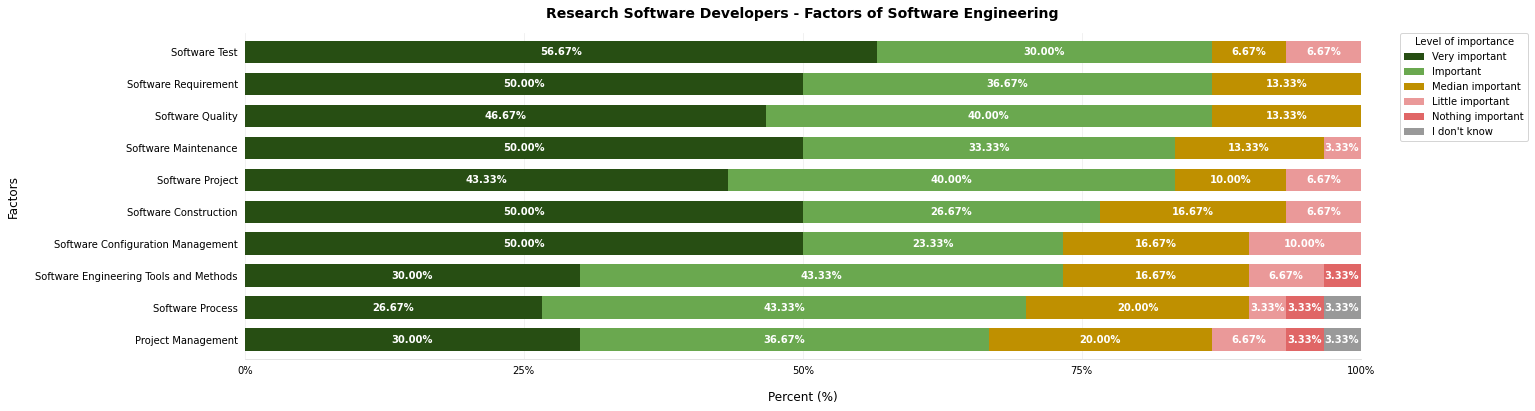

In [ ]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  


# Plot stacked horizontal bar chart
#df3_grafico.plot.barh(stacked=True, title="RS", xlabel ="Frequency", ylabel ="Factors" )
#plt.show()

#plotdata = df3_grafico
plotdata = df7
plotdata.head()


# Define a dictionary mapping variable values to colours:
colours = {"Very important": "#274E13", "Important": "#6AA84F", "Median important": "#BF9000", "Little important": "#EA9999", "Nothing important": "#E06666", "I don\'t know": "#999999"}

plt.rcParams["figure.figsize"] = (20, 6)
#plt.figure(figsize=(10,4))
#ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours).legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.25, 1))

ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours, width=0.7)



## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=10
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    
    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if width > 1:
      label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      # plot only when height is greater than specified value
      if height > 0:
         ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize, color='white', weight='bold')
    # plot only when width is greater than specified value <= 2 
    #else:
     # if width >= 0:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #  ax.text(label_x, label_y, label_text, ha='left', va='top', fontsize=FigBarsFontSize)
     # else:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #   ax.text(label_x, label_y, label_text, ha='left', va='bottom', fontsize=FigBarsFontSize)  


    # plot only when height is greater than specified value
#    if height > 0:
#        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)



ax.legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.15, 1))

#for rowNum,row in ax.iterrows():
#    xpos = 0
#    for val in row:
#        xpos += val
#        ax.text(xpos + 1, rowNum-0.05, str(val), color='black')
#    xpos = 0

#for c in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
#    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c ]
        # set the bar label
#    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')

# add labels
#plt.xlabel("Percent (%)", labelpad=14, fontsize=12)
#plt.ylabel("Factors", labelpad=14, fontsize=12)


#ax = ax.sort_values(by=['Very important', 'Important'], ascending=False)



# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')


ax.set_xlim(0, 100)
ticks = ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(("0%", "25%", "50%", "75%", "100%")) 

# add labels
ax.set_title("Research Software Developers - Factors of Software Engineering", pad=15, fontsize=14, weight='bold')
ax.set_ylabel("Factors", labelpad=15, fontsize=12)
ax.set_xlabel("Percent (%)", labelpad=15, fontsize=12)
#plt.show()

plt.gca().invert_yaxis()

print ('\n \033[1m Horizontal Bar Chart - Research Software - Factors of Software Engineering - Ordered by Combined Very Important and Important Ratings \033[0m')


**RQ2) Which software development processes do reseach software developer use**

In [ ]:
# Selecting columns
df2 = df.loc[:, lambda df:['USA_PROCESSO_D07F01',	'USA_PROCESSO_D07F02',	'USA_PROCESSO_D07F03',	'USA_PROCESSO_D07F04',	'USA_PROCESSO_D07F05',	'USA_PROCESSO_D07F06',	'USA_PROCESSO_D07F07' ]]
#Frequencia de uso de processo
df2.columns = ['Agile Method', 'Waterfall Model', 'Incremental Model', 'Evolutionary Model', 'Spiral Model', 'Unified Process', 'Ad hoc']
df2


,Agile Method,Waterfall Model,Incremental Model,Evolutionary Model,Spiral Model,Unified Process,Ad hoc
0,5.00,5.00,5.00,5.00,5.00,5.00,5.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3.00,2.00,4.00,4.00,0.00,0.00,3.00
3,4.00,2.00,4.00,4.00,2.00,2.00,4.00
4,4.00,3.00,4.00,3.00,2.00,2.00,4.00
5,5.00,1.00,4.00,3.00,3.00,3.00,3.00
6,4.00,3.00,4.00,4.00,3.00,3.00,1.00
7,3.00,2.00,4.00,3.00,1.00,4.00,2.00
8,5.00,3.00,2.00,0.00,0.00,0.00,4.00
9,4.00,1.00,4.00,3.00,1.00,1.00,3.00


In [ ]:
df4_grafico = pd.DataFrame({'Agile Method (%)':[(len(df2.loc[df2['Agile Method'] == 5.0])/30) *100, (len(df2.loc[df2['Agile Method'] == 4.0])/30) *100, (len(df2.loc[df2['Agile Method'] == 3.0])/30) *100, (len(df2.loc[df2['Agile Method'] == 2.0])/30) *100, (len(df2.loc[df2['Agile Method'] == 1.0])/30) *100, (len(df2.loc[df2['Agile Method'] == 0.0])/30) *100],
                   'Waterfall Model (%)':[(len(df2.loc[df2['Waterfall Model'] == 5.0])/30) *100, (len(df2.loc[df2['Waterfall Model'] == 4.0])/30) *100, (len(df2.loc[df2['Waterfall Model'] == 3.0])/30) *100, (len(df2.loc[df2['Waterfall Model'] == 2.0])/30) *100, (len(df2.loc[df2['Waterfall Model'] == 1.0])/30) *100, (len(df2.loc[df2['Waterfall Model'] == 0.0])/30) *100],
                   'Incremental Model (%)':[(len(df2.loc[df2['Incremental Model'] == 5.0])/30) *100, (len(df2.loc[df2['Incremental Model'] == 4.0])/30) *100, (len(df2.loc[df2['Incremental Model'] == 3.0])/30) *100, (len(df2.loc[df2['Incremental Model'] == 2.0])/30) *100, (len(df2.loc[df2['Incremental Model'] == 1.0])/30) *100, (len(df2.loc[df2['Incremental Model'] == 0.0])/30) *100],
                   'Evolutionary Model (%)':[(len(df2.loc[df2['Evolutionary Model'] == 5.0])/30) *100, (len(df2.loc[df2['Evolutionary Model'] == 4.0])/30) *100, (len(df2.loc[df2['Evolutionary Model'] == 3.0])/30) *100, (len(df2.loc[df2['Evolutionary Model'] == 2.0])/30) *100, (len(df2.loc[df2['Evolutionary Model'] == 1.0])/30) *100, (len(df2.loc[df2['Evolutionary Model'] == 0.0])/30) *100],
                   'Spiral Model (%)':[(len(df2.loc[df2['Spiral Model'] == 5.0])/30) *100, (len(df2.loc[df2['Spiral Model'] == 4.0])/30) *100, (len(df2.loc[df2['Spiral Model'] == 3.0])/30) *100, (len(df2.loc[df2['Spiral Model'] == 2.0])/30) *100, (len(df2.loc[df2['Spiral Model'] == 1.0])/30) *100, (len(df2.loc[df2['Spiral Model'] == 0.0])/30) *100],
                   'Unified Process (%)':[(len(df2.loc[df2['Unified Process'] == 5.0])/30) *100, (len(df2.loc[df2['Unified Process'] == 4.0])/30) *100, (len(df2.loc[df2['Unified Process'] == 3.0])/30) *100, (len(df2.loc[df2['Unified Process'] == 2.0])/30) *100, (len(df2.loc[df2['Unified Process'] == 1.0])/30) *100, (len(df2.loc[df2['Unified Process'] == 0.0])/30) *100],
                   'Ad hoc (%)':[(len(df2.loc[df2['Ad hoc'] == 5.0])/30) *100, (len(df2.loc[df2['Ad hoc'] == 4.0])/30) *100, (len(df2.loc[df2['Ad hoc'] == 3.0])/30) *100, (len(df2.loc[df2['Ad hoc'] == 2.0])/30) *100, (len(df2.loc[df2['Ad hoc'] == 1.0])/30) *100, (len(df2.loc[df2['Ad hoc'] == 0.0])/30) *100]
                     })
# Create the index
index_ = ['Always', 'Often', 'Ocasionally', 'Rarely', 'Never', 'I don\'t know']
						
df4_grafico.index = index_

pd.options.display.float_format = '{:.2f}'.format

df4_grafico

center_aligned_df = df4_grafico.style.set_properties(**{'text-align': 'center'})
 
center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df

df4_grafico

,Agile Method (%),Waterfall Model (%),Incremental Model (%),Evolutionary Model (%),Spiral Model (%),Unified Process (%),Ad hoc (%)
Always,33.33,13.33,13.33,13.33,6.67,10.00,16.67
Often,33.33,3.33,46.67,23.33,3.33,10.00,20.00
Ocasionally,23.33,23.33,20.00,16.67,23.33,13.33,16.67
Rarely,3.33,23.33,10.00,16.67,20.00,16.67,20.00
Never,0.00,30.00,3.33,20.00,33.33,33.33,16.67
I don't know,6.67,6.67,6.67,10.00,13.33,16.67,10.00


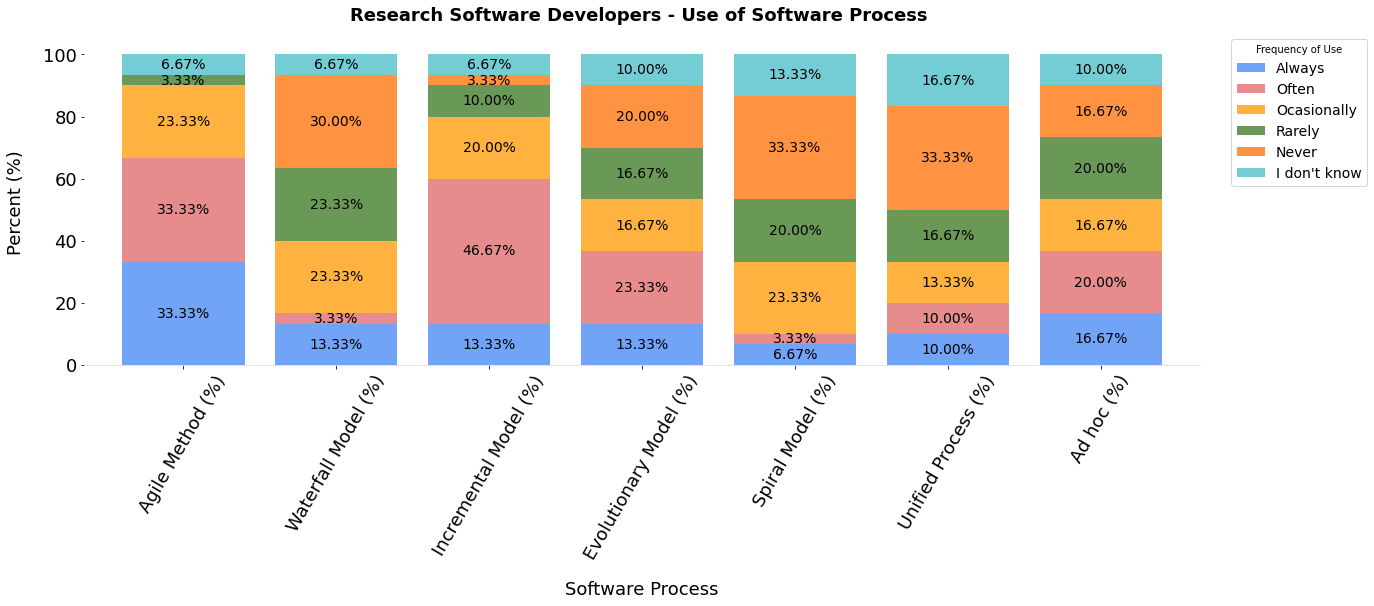

In [ ]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

plotdata = df4_grafico
plotdata.head()

colours = {"Always": "#4285F4", "Often": "#E06666", "Ocasionally": "#FF9900", "Rarely": "#38761D","Never": "#ff6f01" ,"I don't know": "#46bdc6"}

plt.rcParams["figure.figsize"] = (20, 6)

my_list = list(df4_grafico)
length = len(my_list)
val =list()
a = list()
temp = []

for i in range(length):
   #print(my_list[i])
   #val = plotdata[my_list[i]].values
   val = list(df4_grafico[my_list[i]].values)

   for n in range(6):
     a = ((val[n])) 
#     if a > 0:
#    print (a)
     temp.append(a) 
#print (temp)

ax = plotdata.apply(lambda y: y*100/sum(y), axis=0).transpose().plot(kind="bar", stacked=True, color=colours, width=0.8, alpha=0.75, rot=60, fontsize=18)

ax.legend(loc='upper right', ncol=1, title="Frequency of Use", borderaxespad=0, bbox_to_anchor=(1.15, 1), fontsize=14)

#ax = plotdata.apply(lambda x: x*100/sum(x), axis=1)
#apply(lambda y: y*100/sum(y), axis=0)

#ax.set_ylim(0, 100)
#ticks = ax.set_yticks([0, 25, 50, 75, 100])
#ax.set_yticklabels(("0%", "25%", "50%", "75%", "100%")) 
#ax.tick_params(bottom=False, left=False)


## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=14
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if height > 0:
            
      label_text = f'{height:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      #label_text = label_text + " (" + str(int(height*(y)/100)) + ")" 
      #label_text = label_text + " (" + str(int(0)) + ")" 
      # plot only when height is greater than specified value 
      ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)
   

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# add labels
ax.set_title("Research Software Developers - Use of Software Process ", pad=18, fontsize=18, weight='bold')
ax.set_ylabel("Percent (%)", labelpad=18, fontsize=18)
ax.set_xlabel("Software Process", labelpad=18, fontsize=18)

plt.show()

In [ ]:
df8 = df4_grafico[['Agile Method (%)']]
df8

,Agile Method (%)
Always,33.33
Often,33.33
Ocasionally,23.33
Rarely,3.33
Never,0.00
I don't know,6.67


In [ ]:
df10 = df.loc[:, lambda df:['NIVEL_CONHECIMENTO_ENG_SOFT',	'TREINAMENTO_PROCESSO']]
df10.columns = ['Level of knowledge in Software Engineering', 'Received any Training in Software Development Process']
df10

,Level of knowledge in Software Engineering,Received any Training in Software Development Process
0,4.00,1.00
1,2.00,2.00
2,3.00,1.00
3,5.00,1.00
4,3.00,1.00
5,4.00,1.00
6,5.00,1.00
7,5.00,1.00
8,3.00,1.00
9,3.00,1.00


In [ ]:
df11 = df10[['Received any Training in Software Development Process']]
df11

,Received any Training in Software Development Process
0,1.00
1,2.00
2,1.00
3,1.00
4,1.00
5,1.00
6,1.00
7,1.00
8,1.00
9,1.00


In [ ]:
df3_gr = pd.DataFrame({'Received any Training in Software Development Process (%)':[(len(df11.loc[df11['Received any Training in Software Development Process'] == 1.0])/30) *100, (len(df11.loc[df11['Received any Training in Software Development Process'] == 2.0])/30) *100],
                   })
# Create the index
index_ = ['Yes', 'No']
						
df3_gr.index = index_

pd.options.display.float_format = '{:.2f}'.format

df3_gr

center_aligned_df = df3_gr.style.set_properties(**{'text-align': 'center'})
 
center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df

df3_gr

,Received any Training in Software Development Process (%)
Yes,70.00
No,30.00


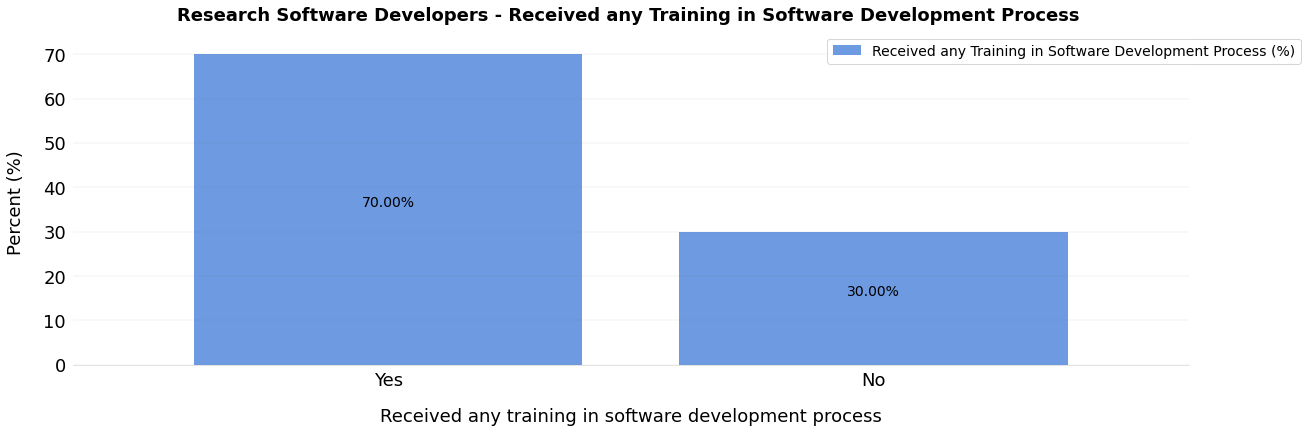

In [ ]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

plotdata = df3_gr
plotdata.head()


#colours = {"Less than 1 year ago": "#4285F4", "Between 1 and 2 years": "#E06666", "Between 3 and 5 years": "#FF9900", "More than 6 years ago": "#38761D"}

plt.rcParams["figure.figsize"] = (20, 6)

ax = plotdata.apply(lambda y: y*100/sum(y), axis=0).plot(kind="bar", stacked=True, color="#3C78D8", width=0.8, alpha=0.75, rot=0, fontsize=18)

ax.legend(loc='upper right', ncol=1, title="", borderaxespad=0, bbox_to_anchor=(1.10, 1), fontsize=14)

ax.tick_params(bottom=False, left=False)

## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=14
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # ax.text(x, y, text)
    label_x = x + width  /2
    label_y = y + height  /2

    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if height > 0:
            
      label_text = f'{height:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      #label_text = label_text + " (" + str(int(height*(y)/100)) + ")" 
      #label_text = label_text + " (" + str(int(0)) + ")" 
      # plot only when height is greater than specified value 
      ax.text(label_x, label_y, label_text, ha='center', va='bottom', fontsize=FigBarsFontSize)
   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# add labels
ax.set_title("Research Software Developers - Received any Training in Software Development Process ", pad=18, fontsize=18, weight='bold')
ax.set_ylabel("Percent (%)", labelpad=18, fontsize=18)
ax.set_xlabel("Received any training in software development process", labelpad=18, fontsize=18)

plt.grid(True, color = "grey", axis='y', linewidth = "0.1", linestyle = "solid")

plt.show()

**Importance of Software Process**

In [ ]:
df12 = df7[['Software Process']]
df12

,Software Process
Very important,26.67
Important,43.33
Median important,20.00
Little important,3.33
Nothing important,3.33
I don't know,3.33


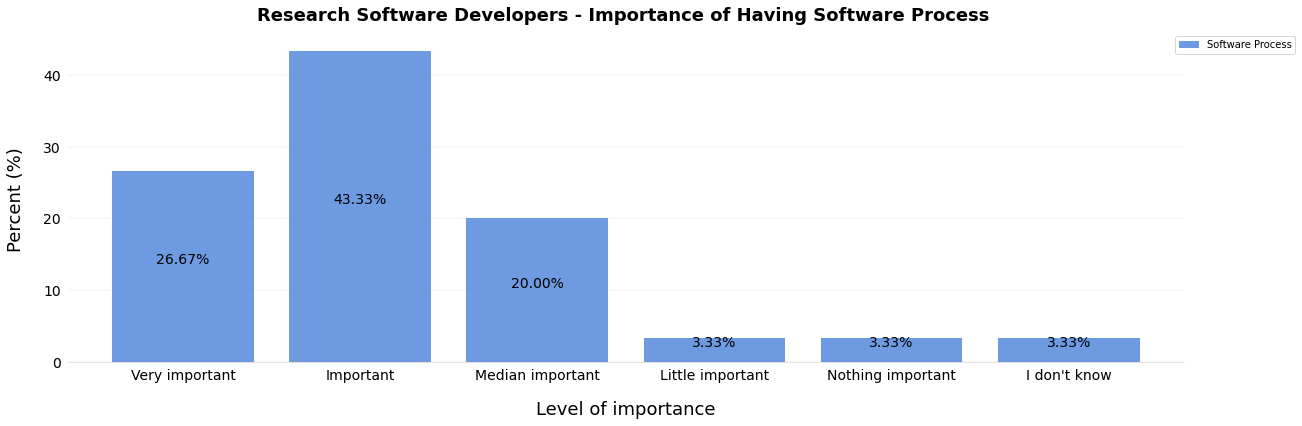

In [ ]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

plotdata = df12
plotdata.head()


#colours = {"Less than 1 year ago": "#4285F4", "Between 1 and 2 years": "#E06666", "Between 3 and 5 years": "#FF9900", "More than 6 years ago": "#38761D"}

plt.rcParams["figure.figsize"] = (20, 6)

ax = plotdata.apply(lambda y: y*100/sum(y), axis=0).plot(kind="bar", stacked=True, color="#3C78D8", width=0.8, alpha=0.75, rot=0, fontsize=14)

ax.legend(loc='upper right', ncol=1, title="", borderaxespad=0, bbox_to_anchor=(1.10, 1))

ax.tick_params(bottom=False, left=False)

## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=14
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # ax.text(x, y, text)
    label_x = x + width  /2
    label_y = y + height  /2

    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if height > 0:
            
      label_text = f'{height:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      #label_text = label_text + " (" + str(int(height*(y)/100)) + ")" 
      #label_text = label_text + " (" + str(int(0)) + ")" 
      # plot only when height is greater than specified value 
      ax.text(label_x, label_y, label_text, ha='center', va='bottom', fontsize=FigBarsFontSize)
   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# add labels
ax.set_title("Research Software Developers - Importance of Having Software Process ", pad=15, fontsize=18, weight='bold')
ax.set_ylabel("Percent (%)", labelpad=18, fontsize=18)
ax.set_xlabel("Level of importance", labelpad=18, fontsize=18)

plt.grid(True, color = "grey", axis='y', linewidth = "0.1", linestyle = "solid")

plt.show()

**RQ4) What is the relationship between the level of importance placed on software process and the use of agile software process**

In [ ]:
df13 = df1_extra

In [ ]:
df4_gr = pd.DataFrame({'Very important':[len(df13[(df13['Importance of Software Process'] == 5.0) & (df13['Use of Agile Method'] == 0.0)]) ,len(df13[(df13['Importance of Software Process'] == 5.0) & (df13['Use of Agile Method'] == 1.0)]), len(df13[(df13['Importance of Software Process'] == 5.0) & (df13['Use of Agile Method'] == 2.0)]), len(df13[(df13['Importance of Software Process'] == 5.0) & (df13['Use of Agile Method'] == 3.0)]), len(df13[(df13['Importance of Software Process'] == 5.0) & (df13['Use of Agile Method'] == 4.0)]), len(df13[(df13['Importance of Software Process'] == 5.0) & (df13['Use of Agile Method'] == 5.0)])],
                  'Important':[len(df13[(df13['Importance of Software Process'] == 4.0) & (df13['Use of Agile Method'] == 0.0)]) ,len(df13[(df13['Importance of Software Process'] == 4.0) & (df13['Use of Agile Method'] == 1.0)]), len(df13[(df13['Importance of Software Process'] == 4.0) & (df13['Use of Agile Method'] == 2.0)]), len(df13[(df13['Importance of Software Process'] == 4.0) & (df13['Use of Agile Method'] == 3.0)]), len(df13[(df13['Importance of Software Process'] == 4.0) & (df13['Use of Agile Method'] == 4.0)]), len(df13[(df13['Importance of Software Process'] == 4.0) & (df13['Use of Agile Method'] == 5.0)])],
               'Median important':[len(df13[(df13['Importance of Software Process'] == 3.0) & (df13['Use of Agile Method'] == 0.0)]) ,len(df13[(df13['Importance of Software Process'] == 3.0) & (df13['Use of Agile Method'] == 1.0)]), len(df13[(df13['Importance of Software Process'] == 3.0) & (df13['Use of Agile Method'] == 2.0)]), len(df13[(df13['Importance of Software Process'] == 3.0) & (df13['Use of Agile Method'] == 3.0)]), len(df13[(df13['Importance of Software Process'] == 3.0) & (df13['Use of Agile Method'] == 4.0)]), len(df13[(df13['Importance of Software Process'] == 3.0) & (df13['Use of Agile Method'] == 5.0)])],
               'Little important':[len(df13[(df13['Importance of Software Process'] == 2.0) & (df13['Use of Agile Method'] == 0.0)]) ,len(df13[(df13['Importance of Software Process'] == 2.0) & (df13['Use of Agile Method'] == 1.0)]), len(df13[(df13['Importance of Software Process'] == 2.0) & (df13['Use of Agile Method'] == 2.0)]), len(df13[(df13['Importance of Software Process'] == 2.0) & (df13['Use of Agile Method'] == 3.0)]), len(df13[(df13['Importance of Software Process'] == 2.0) & (df13['Use of Agile Method'] == 4.0)]), len(df13[(df13['Importance of Software Process'] == 2.0) & (df13['Use of Agile Method'] == 5.0)])],
               'Nothing important':[len(df13[(df13['Importance of Software Process'] == 1.0) & (df13['Use of Agile Method'] == 0.0)]) ,len(df13[(df13['Importance of Software Process'] == 1.0) & (df13['Use of Agile Method'] == 1.0)]), len(df13[(df13['Importance of Software Process'] == 1.0) & (df13['Use of Agile Method'] == 2.0)]), len(df13[(df13['Importance of Software Process'] == 1.0) & (df13['Use of Agile Method'] == 3.0)]), len(df13[(df13['Importance of Software Process'] == 1.0) & (df13['Use of Agile Method'] == 4.0)]), len(df13[(df13['Importance of Software Process'] == 1.0) & (df13['Use of Agile Method'] == 5.0)])],
                'I don\'t know':[len(df13[(df13['Importance of Software Process'] == 0.0) & (df13['Use of Agile Method'] == 0.0)]) ,len(df13[(df13['Importance of Software Process'] == 0.0) & (df13['Use of Agile Method'] == 1.0)]), len(df13[(df13['Importance of Software Process'] == 0.0) & (df13['Use of Agile Method'] == 2.0)]), len(df13[(df13['Importance of Software Process'] == 0.0) & (df13['Use of Agile Method'] == 3.0)]), len(df13[(df13['Importance of Software Process'] == 0.0) & (df13['Use of Agile Method'] == 4.0)]), len(df13[(df13['Importance of Software Process'] == 0.0) & (df13['Use of Agile Method'] == 5.0)])],
                           
                })
# Create the index
index_ = ['I don\'t know', 'Never', 'Rarely', 'Ocasionally', 'Often', 'Always' ]
df4_gr.index = index_

pd.options.display.float_format = '{:.2f}'.format

df4_gr

center_aligned_df = df4_gr.style.set_properties(**{'text-align': 'center'})
 
center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df

df4_gr

,Very important,Important,Median important,Little important,Nothing important,I don't know
I don't know,1,0,1,0,0,0
Never,0,0,0,0,0,0
Rarely,1,0,0,0,0,0
Ocasionally,1,2,3,1,0,0
Often,2,6,1,0,1,0
Always,3,5,1,0,0,1


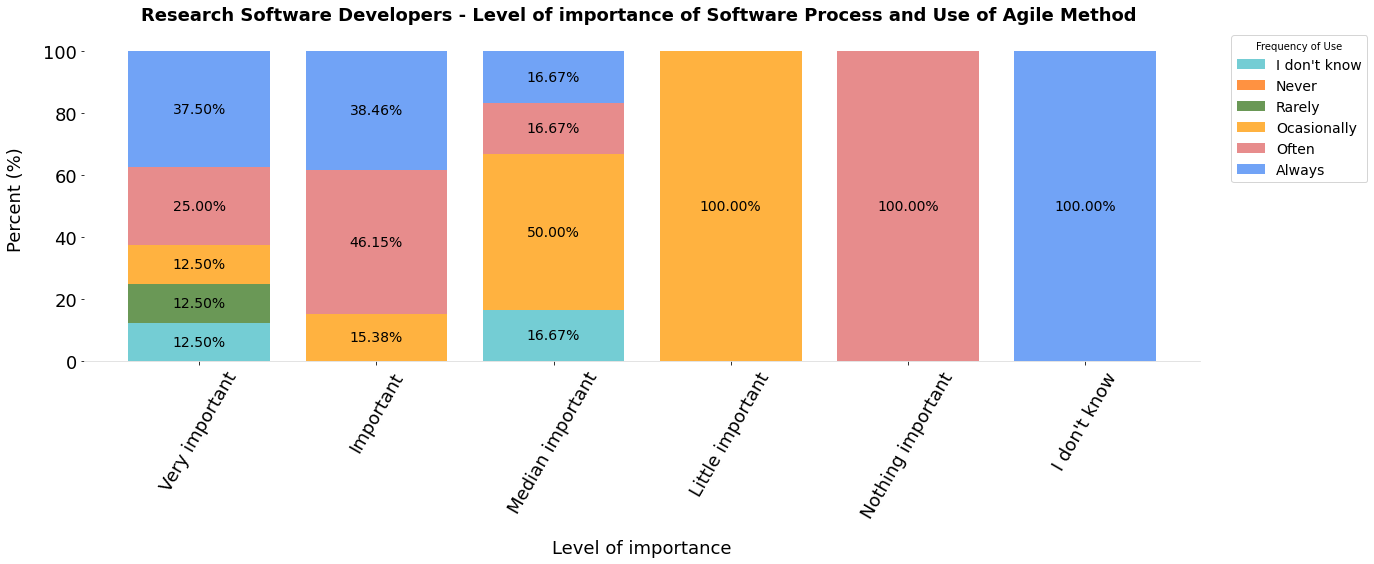

In [ ]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

plotdata = df4_gr
plotdata.head()

colours = {"Always": "#4285F4", "Often": "#E06666", "Ocasionally": "#FF9900", "Rarely": "#38761D","Never": "#ff6f01" ,"I don't know": "#46bdc6"}

plt.rcParams["figure.figsize"] = (20, 6)

my_list = list(df4_gr)
length = len(my_list)
val =list()
a = list()
temp = []

for i in range(length):
   #print(my_list[i])
   #val = plotdata[my_list[i]].values
   val = list(df4_gr[my_list[i]].values)

   for n in range(6):
     a = ((val[n])) 
#     if a > 0:
#    print (a)
     temp.append(a) 
#print (temp)

ax = plotdata.apply(lambda y: y*100/sum(y), axis=0).transpose().plot(kind="bar", stacked=True, color=colours, width=0.8, alpha=0.75, rot=60, fontsize=18)

ax.legend(loc='upper right', ncol=1, title="Frequency of Use", borderaxespad=0, bbox_to_anchor=(1.15, 1), fontsize=14)

#ax = plotdata.apply(lambda x: x*100/sum(x), axis=1)
#apply(lambda y: y*100/sum(y), axis=0)

#ax.set_ylim(0, 100)
#ticks = ax.set_yticks([0, 25, 50, 75, 100])
#ax.set_yticklabels(("0%", "25%", "50%", "75%", "100%")) 
#ax.tick_params(bottom=False, left=False)


## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=14
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if height > 0:
            
      label_text = f'{height:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      #label_text = label_text + " (" + str(int(height*(y)/100)) + ")" 
      #label_text = label_text + " (" + str(int(0)) + ")" 
      # plot only when height is greater than specified value 
      ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)
   

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# add labels
ax.set_title("Research Software Developers - Level of importance of Software Process and Use of Agile Method ", pad=15, fontsize=18, weight='bold')
ax.set_ylabel("Percent (%)", labelpad=18, fontsize=18)
ax.set_xlabel("Level of importance", labelpad=18, fontsize=18)

plt.show()

**2) Chi square Test**

**RQ5a) What is the relationship between level of importance of software development process and the use of agile software process?**


**RQ5b) What is the relationship between software development process training and the use of agile software process?**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency
df_crosstab = pd.crosstab(df['USA_PROCESSO_D07F01'], df['ENG_SOFT_D04F08'])

print(df_crosstab)



ENG_SOFT_D04F08      0.00  1.00  2.00  3.00  4.00  5.00
USA_PROCESSO_D07F01                                    
0.00                    0     0     0     1     0     1
2.00                    0     0     0     0     0     1
3.00                    0     0     1     3     2     1
4.00                    0     1     0     1     6     2
5.00                    1     0     0     1     5     3


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from scipy.stats import chi2_contingency

stats.chi2_contingency(df_crosstab)

Chi2ContingencyResult(statistic=16.645604395604398, pvalue=0.6758515398405947, dof=20, expected_freq=array([[0.06666667, 0.06666667, 0.06666667, 0.4       , 0.86666667,
        0.53333333],
       [0.03333333, 0.03333333, 0.03333333, 0.2       , 0.43333333,
        0.26666667],
       [0.23333333, 0.23333333, 0.23333333, 1.4       , 3.03333333,
        1.86666667],
       [0.33333333, 0.33333333, 0.33333333, 2.        , 4.33333333,
        2.66666667],
       [0.33333333, 0.33333333, 0.33333333, 2.        , 4.33333333,
        2.66666667]]))

**Result: Importance of Sofware Process versus Use os Agile Method**

The first value (16.645604395604398) is the Chi-square value, followed by the p-value (0.6758515398405947), then comes the degrees of freedom (20), and lastly it outputs the expected frequencies as an array.

Since all of the expected most of frequencies are greater than 5, the chi2 test results can be trusted.

We can reject the null hypothesis as the p-value is less than 0.05. The results indicate that the p-value is more than 0.05. Thus, Chi-square test was not signficant, i.e., the ratio of years of experience was not significantly dependent on the profile.

Chi-squared test (χ2(20) = 16.64, p = .676).

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency

df_crosstab2 = pd.crosstab(df['TREINAMENTO_PROCESSO'], df['ENG_SOFT_D04F09'])

print(df_crosstab2)

ENG_SOFT_D04F09       1.00  2.00  3.00  4.00  5.00
TREINAMENTO_PROCESSO                              
1.00                     1     1     3    14     2
2.00                     0     1     0     2     6


In [ ]:
stats.chi2_contingency(df_crosstab2)

Chi2ContingencyResult(statistic=12.142857142857142, pvalue=0.016319965377759524, dof=4, expected_freq=array([[ 0.7,  1.4,  2.1, 11.2,  5.6],
       [ 0.3,  0.6,  0.9,  4.8,  2.4]]))

**Result: Importance of Sofware Process versus Having Training on Software Process**

The first value (10.83028083028083) is the Chi-square value, followed by the p-value (0.05485081098999031), then comes the degrees of freedom (5), and lastly it outputs the expected frequencies as an array.

Since all of the expected most of frequencies are greater than 5, the chi2 test results can be trusted.

'ENG_SOFT_D04F08':

We can reject the null hypothesis as the p-value is less than 0.05. The results indicate that the p-value is more than 0.05. Thus, Chi-square test was not signficant, i.e., the ratio of years of experience was not significantly dependent on the profile.

Chi-squared test (χ2(5) = 16.64, p = .054).


'ENG_SOFT_D04F09':

The chi-square test of independence showed that there is an association
between the participant having received some training in the
software development and the level of importance of having a software development process (X2(4)=12.143; p < 0.05). Furthermore, the association was 63.6% between the two variables for Cramer's V.


In [ ]:
X2 = stats.chi2_contingency(df_crosstab2, correction=False)[0]
N = np.sum(df_crosstab2)
minimum_dimension = min(df_crosstab2.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result)

ENG_SOFT_D04F09
1.00   3.48
2.00   2.46
3.00   2.01
4.00   0.87
5.00   1.23
dtype: float64


0 indicates no association between the two variables.
1 indicates a strong association between the two variables.

In [ ]:
from scipy.stats.contingency import association

association(df_crosstab2, method="cramer")

0.6362090102803518

The association was 63.62% between the two variables for Cramer's V.

**RQ6) What is the overall level of Software Engineering knowledge by research software developers?**

In [ ]:
df15 = df10[['Level of knowledge in Software Engineering']]
df15

,Level of knowledge in Software Engineering
0,4.00
1,2.00
2,3.00
3,5.00
4,3.00
5,4.00
6,5.00
7,5.00
8,3.00
9,3.00


In [ ]:
df15_gr = pd.DataFrame({'Level of knowledge in Software Engineering (%)':[(len(df15.loc[df15['Level of knowledge in Software Engineering'] == 1.0])/30) *100, 
                    (len(df15.loc[df15['Level of knowledge in Software Engineering'] == 2.0])/30) *100,
                   (len(df15.loc[df15['Level of knowledge in Software Engineering'] == 3.0])/30) *100,
                   (len(df15.loc[df15['Level of knowledge in Software Engineering'] == 4.0])/30) *100,
                   (len(df15.loc[df15['Level of knowledge in Software Engineering'] == 5.0])/30) *100,]
                                     
                    })
# Create the index
index_ = ['None', 'Basic', 'Medium', 'High', 'Advanced']
						

df15_gr.index = index_

pd.options.display.float_format = '{:.2f}'.format

df15_gr

center_aligned_df = df15_gr.style.set_properties(**{'text-align': 'center'})
 
center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df

df15_gr

,Level of knowledge in Software Engineering (%)
None,3.33
Basic,6.67
Medium,36.67
High,23.33
Advanced,30.00


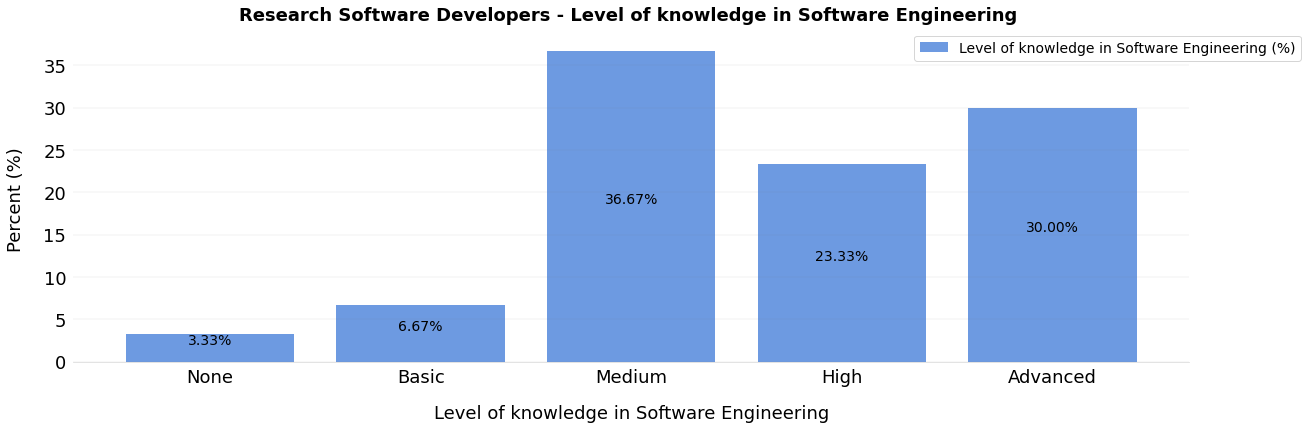

In [ ]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

plotdata = df15_gr
plotdata.head()


#colours = {"Less than 1 year ago": "#4285F4", "Between 1 and 2 years": "#E06666", "Between 3 and 5 years": "#FF9900", "More than 6 years ago": "#38761D"}

plt.rcParams["figure.figsize"] = (20, 6)

ax = plotdata.apply(lambda y: y*100/sum(y), axis=0).plot(kind="bar", stacked=True, color="#3C78D8", width=0.8, alpha=0.75, rot=0, fontsize=18)

ax.legend(loc='upper right', ncol=1, title="", borderaxespad=0, bbox_to_anchor=(1.10, 1), fontsize=14)

ax.tick_params(bottom=False, left=False)

## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=14
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # ax.text(x, y, text)
    label_x = x + width  /2
    label_y = y + height  /2

    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if height > 0:
            
      label_text = f'{height:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      #label_text = label_text + " (" + str(int(height*(y)/100)) + ")" 
      #label_text = label_text + " (" + str(int(0)) + ")" 
      # plot only when height is greater than specified value 
      ax.text(label_x, label_y, label_text, ha='center', va='bottom', fontsize=FigBarsFontSize)
   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# add labels
ax.set_title("Research Software Developers - Level of knowledge in Software Engineering ", pad=15, fontsize=18, weight='bold')
ax.set_ylabel("Percent (%)", labelpad=18, fontsize=18)
ax.set_xlabel("Level of knowledge in Software Engineering", labelpad=18, fontsize=18)

plt.grid(True, color = "grey", axis='y', linewidth = "0.1", linestyle = "solid")

plt.show()

**RQ7) What is the relationship between level of Software Engineering knowledge and level of importance placed on use of tool and method of Software Engineering?**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency

df_crosstab3 = pd.crosstab(df['NIVEL_CONHECIMENTO_ENG_SOFT'], df['ENG_SOFT_D04F12'])

print(df_crosstab3)

ENG_SOFT_D04F12              1.00  2.00  3.00  4.00  5.00
NIVEL_CONHECIMENTO_ENG_SOFT                              
1.00                            1     0     0     0     0
2.00                            0     1     0     1     0
3.00                            0     1     2     6     2
4.00                            0     0     1     3     3
5.00                            0     0     2     3     4


In [ ]:

stats.chi2_contingency(df_crosstab3)


Chi2ContingencyResult(statistic=39.974044474044476, pvalue=0.0007854122513329157, dof=16, expected_freq=array([[0.03333333, 0.06666667, 0.16666667, 0.43333333, 0.3       ],
       [0.06666667, 0.13333333, 0.33333333, 0.86666667, 0.6       ],
       [0.36666667, 0.73333333, 1.83333333, 4.76666667, 3.3       ],
       [0.23333333, 0.46666667, 1.16666667, 3.03333333, 2.1       ],
       [0.3       , 0.6       , 1.5       , 3.9       , 2.7       ]]))

In [ ]:
X2 = stats.chi2_contingency(df_crosstab3, correction=False)[0]
N = np.sum(df_crosstab3)
minimum_dimension = min(df_crosstab3.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result)

ENG_SOFT_D04F12
1.00   3.16
2.00   2.24
3.00   1.41
4.00   0.88
5.00   1.05
dtype: float64


In [ ]:
from scipy.stats.contingency import association

association(df_crosstab3, method="cramer")

0.5771629209189585